In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/kamila/Desktop/python_projects/insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
# Wybierz zmienne ilościowe, które chcesz analizować
quantitative_vars = ['age','bmi','children','charges']

# Statystyki opisowe dla wybranych zmiennych
stats = df[quantitative_vars].describe().T  # Podstawowe statystyki
stats['mode'] = df[quantitative_vars].mode().iloc[0]  # Moda (najczęstsza wartość)
stats['var'] = df[quantitative_vars].var()  # Wariancja

# Dodajemy wariancję do istniejącej tabeli
stats['var'] = df[quantitative_vars].var()

# Pokaż wyniki
print(stats)

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max       mode           var  
age          51.000000     64.00000    18.0000  1.974014e+02  
bmi          34.693750     53.13000    32.3000  3.718788e+01  
children      2.000000      5.00000     0.0000  1.453213e+00  
charges   16639.912515  63770.42801  1639.5631  1.466524e+08  


In [16]:
# Analiza zmiennych jakościowych
categorical_vars = ['sex', 'smoker', 'region']
for var in categorical_vars:
    print(f"Tabela liczności dla zmiennej {var}:")
    print(df[var].value_counts())
    print("\n")


Tabela liczności dla zmiennej sex:
sex
male      676
female    662
Name: count, dtype: int64


Tabela liczności dla zmiennej smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64


Tabela liczności dla zmiennej region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




In [17]:
# Tworzenie tabeli wielodzielczej
pivot_table = pd.pivot_table(df, values='charges', index=['sex', 'region'], columns='smoker', aggfunc='count', fill_value=0)

# Wyświetlenie tabeli wielodzielczej
print("Tabela wielodzielcza (płeć, region vs status palenia):")
print(pivot_table)

Tabela wielodzielcza (płeć, region vs status palenia):
smoker             no  yes
sex    region             
female northeast  132   29
       northwest  135   29
       southeast  139   36
       southwest  141   21
male   northeast  125   38
       northwest  132   29
       southeast  134   55
       southwest  126   37


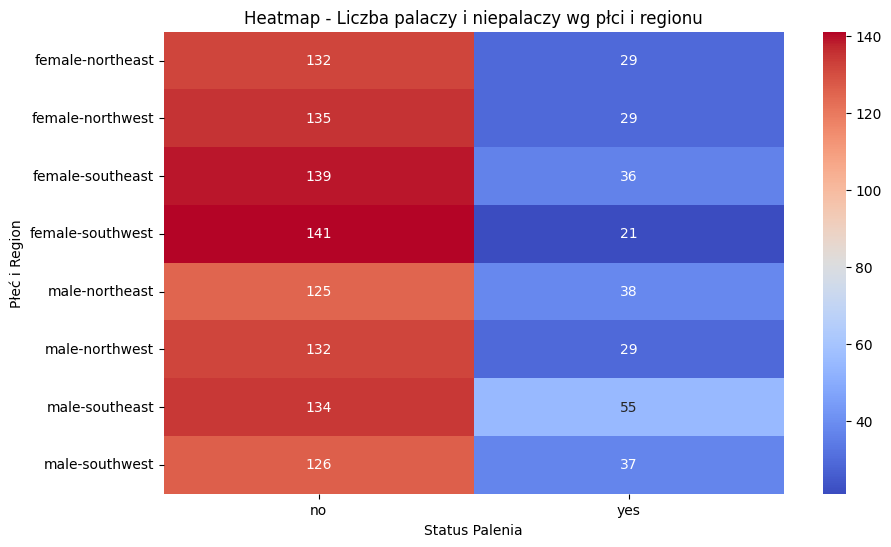

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = pd.pivot_table(df, values='charges', index=['sex', 'region'], columns='smoker', aggfunc='count', fill_value=0)

# Wizualizacja za pomocą heatmapy
plt.figure(figsize=(10, 6))  # Ustawienie rozmiaru figury
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Heatmap - Liczba palaczy i niepalaczy wg płci i regionu')
plt.ylabel('Płeć i Region')
plt.xlabel('Status Palenia')
plt.show()

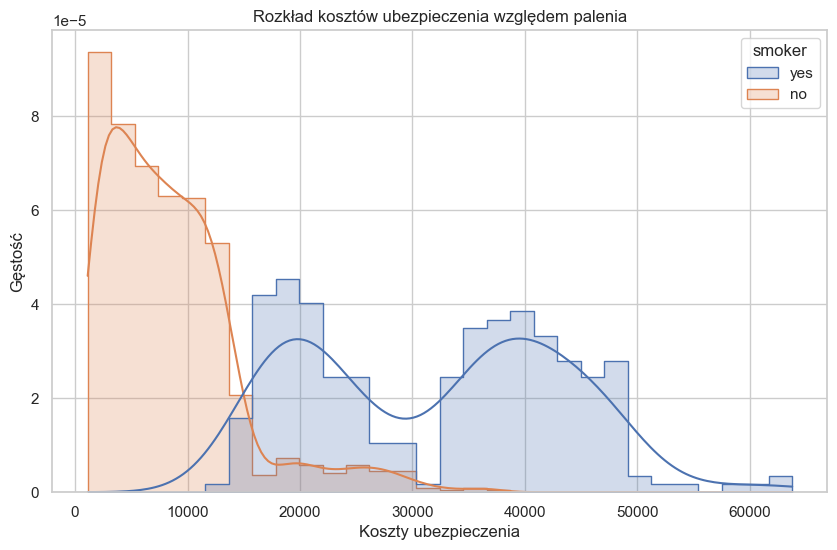

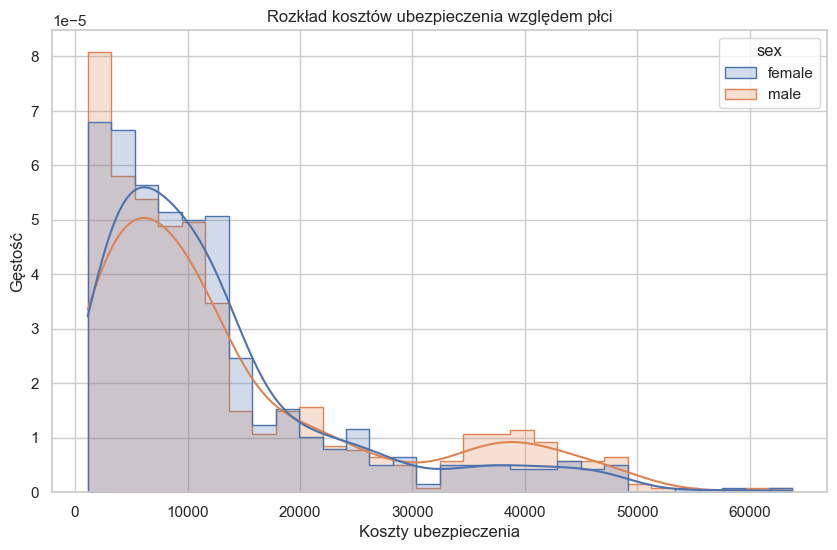

In [21]:
sns.set(style="whitegrid")

# Histogram skategoryzowany dla 'charges' względem 'smoker'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', element='step', stat='density', common_norm=False, kde=True)
plt.title('Rozkład kosztów ubezpieczenia względem palenia')
plt.xlabel('Koszty ubezpieczenia')
plt.ylabel('Gęstość')
plt.show()

# Histogram skategoryzowany dla 'charges' względem 'sex'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='sex', element='step', stat='density', common_norm=False, kde=True)
plt.title('Rozkład kosztów ubezpieczenia względem płci')
plt.xlabel('Koszty ubezpieczenia')
plt.ylabel('Gęstość')
plt.show()

C:\Users\kamila\AppData\Local\Temp\ipykernel_11652\2307571366.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='smoker', y='charges', hue='sex', data=df, ci='sd', palette='coolwarm')


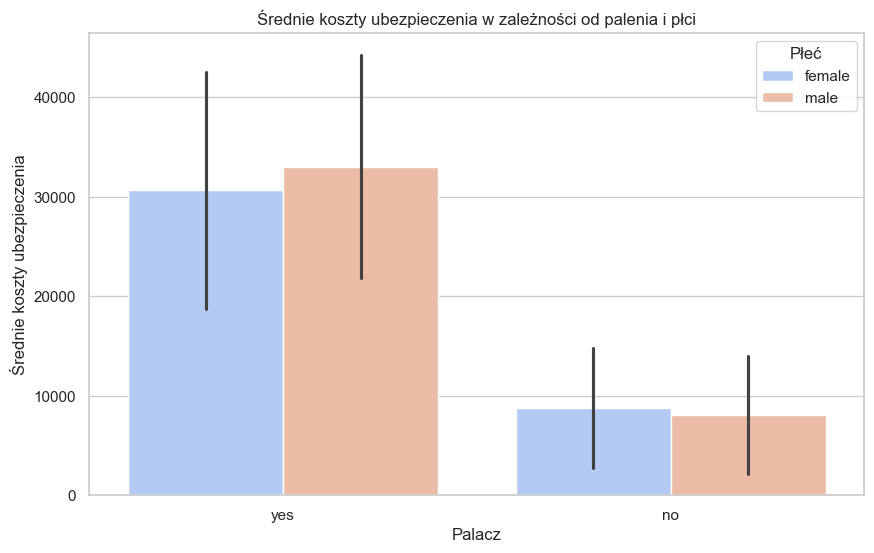

In [22]:
sns.set(style="whitegrid")

# Tworzenie wykresu średnich w grupach dla 'charges' względem 'smoker' i 'sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', hue='sex', data=df, ci='sd', palette='coolwarm')
plt.title('Średnie koszty ubezpieczenia w zależności od palenia i płci')
plt.xlabel('Palacz')
plt.ylabel('Średnie koszty ubezpieczenia')
plt.legend(title='Płeć')
plt.show()

C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


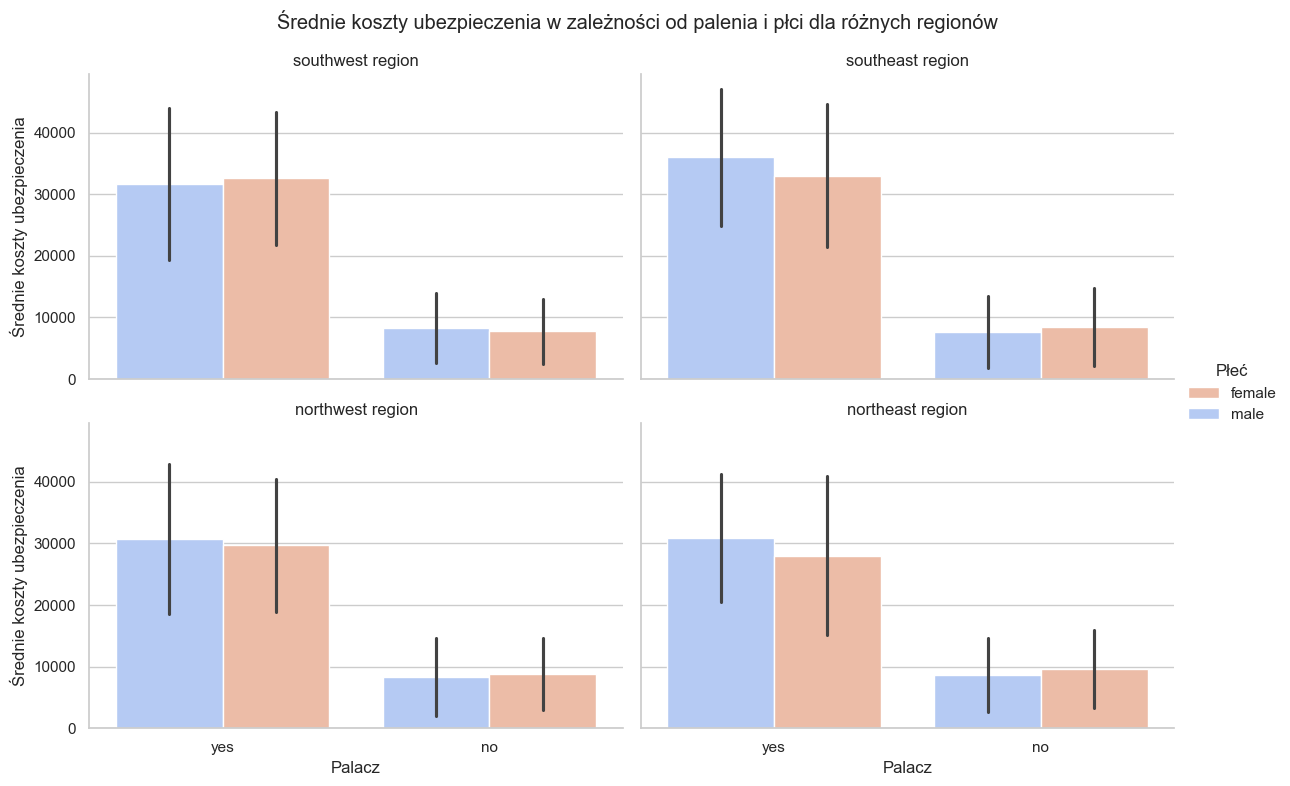

In [23]:
sns.set(style="whitegrid")

# Tworzenie wykresu średnich w grupach z podziałem na regiony
g = sns.FacetGrid(df, col="region", height=4, aspect=1.5, col_wrap=2)
g.map_dataframe(sns.barplot, x='smoker', y='charges', hue='sex', ci='sd', palette='coolwarm')
g.add_legend(title='Płeć')
g.set_titles("{col_name} region")
g.set_axis_labels("Palacz", "Średnie koszty ubezpieczenia")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in g
g.fig.suptitle('Średnie koszty ubezpieczenia w zależności od palenia i płci dla różnych regionów')

plt.show()

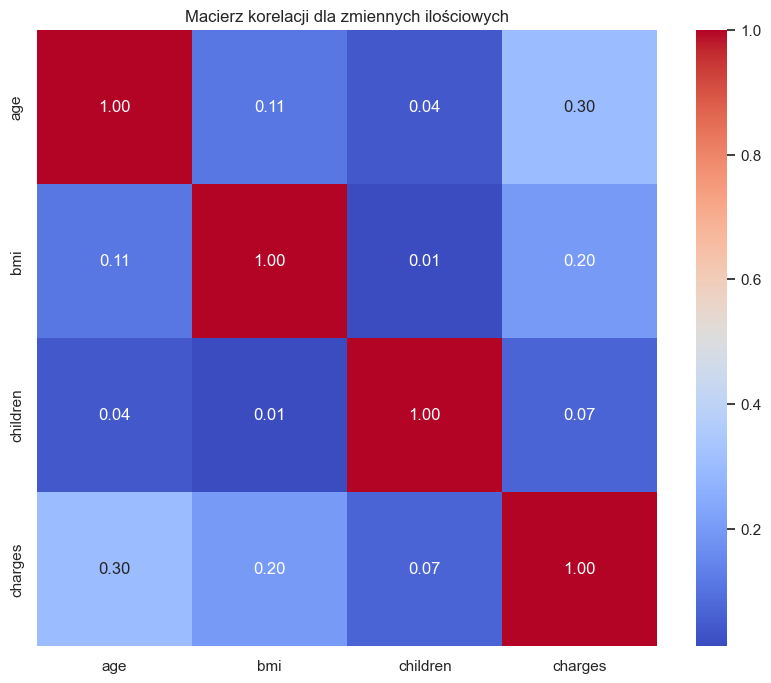

In [24]:
quantitative_vars = ['age', 'bmi', 'children', 'charges']

# Obliczenie macierzy korelacji
correlation_matrix = df[quantitative_vars].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Macierz korelacji dla zmiennych ilościowych')
plt.show()

In [30]:
import pandas as pd
# Zakategoryzowanie 'charges' na kwartyle
df['charges_cat'] = pd.qcut(df['charges'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

In [31]:
from scipy.stats import chi2_contingency

def perform_chi2_test(df, col1, col2):
    # Tworzenie tablicy kontyngencji
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Wykonanie testu Chi-kwadrat
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Test Chi-kwadrat dla {col1} i {col2}:")
    print(f"Chi2 statystyka: {chi2}")
    print(f"p-wartość: {p}")
    print(f"Stopnie swobody: {dof}\n")
    print(f"Oczekiwane częstości:\n{expected}\n")
    print("--------------------------------------------------\n")


In [32]:
# Lista zmiennych jakościowych
qualitative_vars = ['sex', 'smoker', 'region']

# Przeprowadzenie testów Chi-kwadrat dla każdej zmiennej jakościowej względem zakategoryzowanej 'charges'
for var in qualitative_vars:
    perform_chi2_test(df, var, 'charges_cat')


Test Chi-kwadrat dla sex i charges_cat:
Chi2 statystyka: 9.532132496058633
p-wartość: 0.022991970178817194
Stopnie swobody: 3

Oczekiwane częstości:
[[165.74738416 165.25261584 165.25261584 165.74738416]
 [169.25261584 168.74738416 168.74738416 169.25261584]]

--------------------------------------------------

Test Chi-kwadrat dla smoker i charges_cat:
Chi2 statystyka: 854.02026762137
p-wartość: 8.318345578359641e-185
Stopnie swobody: 3

Oczekiwane częstości:
[[266.39760837 265.60239163 265.60239163 266.39760837]
 [ 68.60239163  68.39760837  68.39760837  68.60239163]]

--------------------------------------------------

Test Chi-kwadrat dla region i charges_cat:
Chi2 statystyka: 20.692046989722932
p-wartość: 0.014090232194898857
Stopnie swobody: 9

Oczekiwane częstości:
[[81.12107623 80.87892377 80.87892377 81.12107623]
 [81.37144993 81.12855007 81.12855007 81.37144993]
 [91.13602392 90.86397608 90.86397608 91.13602392]
 [81.37144993 81.12855007 81.12855007 81.37144993]]

------------

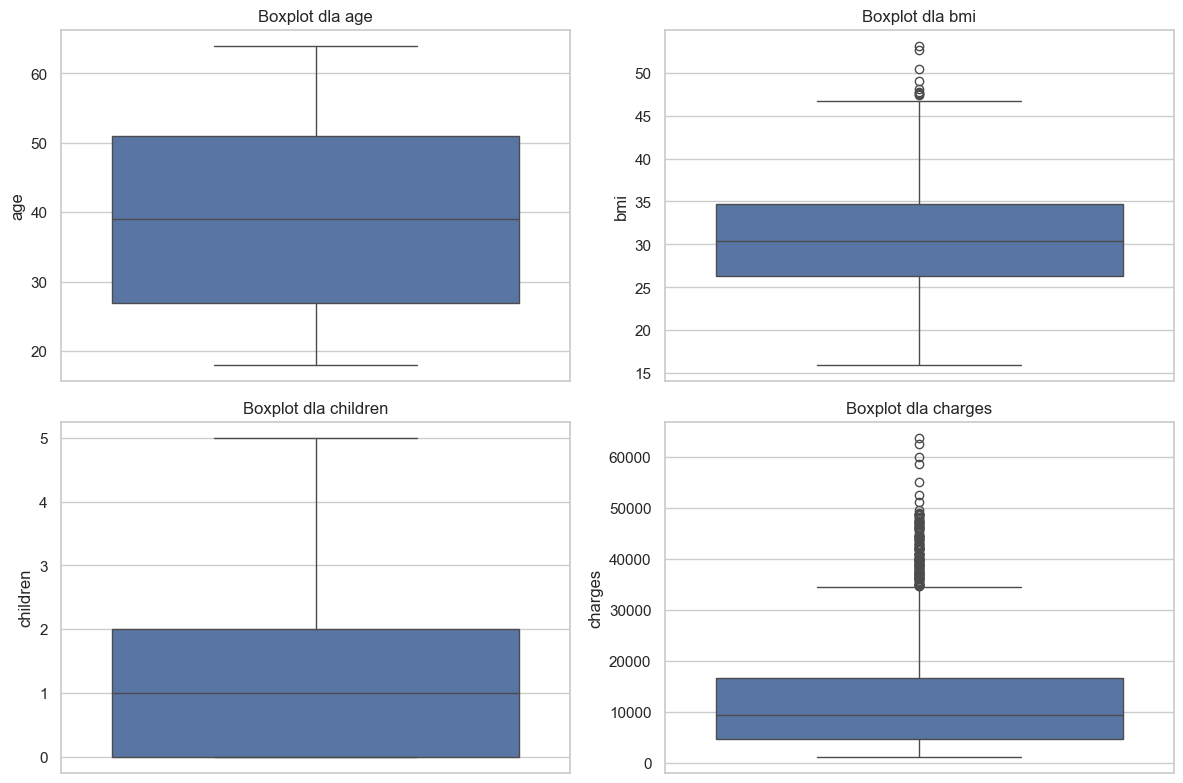

In [34]:
sns.set(style="whitegrid")

# zmienne ilościowe
quantitative_vars = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot dla {var}')
plt.tight_layout()
plt.show()

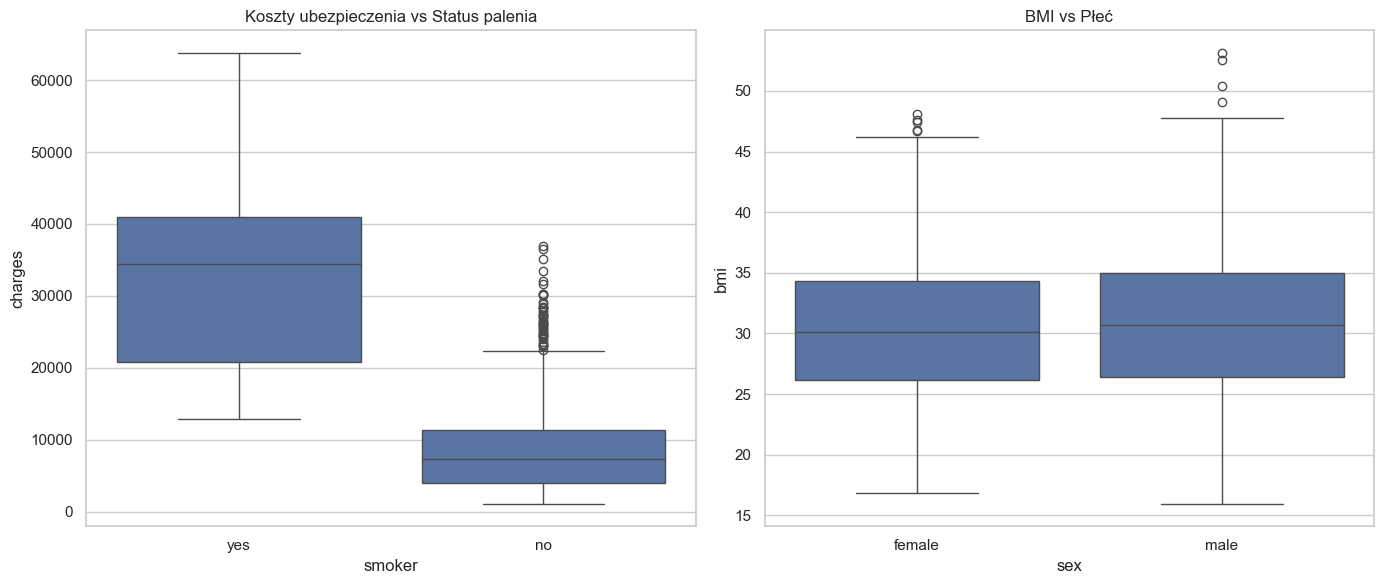

In [35]:
plt.figure(figsize=(14, 6))

# Wykres dla charges vs smoker
plt.subplot(1, 2, 1)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Koszty ubezpieczenia vs Status palenia')

# Wykres dla bmi vs sex
plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('BMI vs Płeć')

plt.tight_layout()
plt.show()


In [36]:
import scipy.stats as stats

# Lista zmiennych ilościowych
quantitative_vars = ['age', 'bmi', 'children', 'charges']

# Wykonanie testu Shapiro-Wilka dla każdej zmiennej ilościowej
for var in quantitative_vars:
    stat, p = stats.shapiro(df[var])
    print(f"Test Shapiro-Wilka dla {var}:")
    print(f"Statystyka W: {stat}, p-wartość: {p}")
    if p < 0.05:
        print("Rozkład nie jest normalny.")
    else:
        print("Rozkład jest normalny.")
    print("--------------------------------------------------\n")


Test Shapiro-Wilka dla age:
Statystyka W: 0.9447009637825445, p-wartość: 5.69204692845418e-22
Rozkład nie jest normalny.
--------------------------------------------------

Test Shapiro-Wilka dla bmi:
Statystyka W: 0.9938864621676107, p-wartość: 2.6046836879834408e-05
Rozkład nie jest normalny.
--------------------------------------------------

Test Shapiro-Wilka dla children:
Statystyka W: 0.823180467362945, p-wartość: 5.066436570900864e-36
Rozkład nie jest normalny.
--------------------------------------------------

Test Shapiro-Wilka dla charges:
Statystyka W: 0.8146881157362383, p-wartość: 1.1505226334932036e-36
Rozkład nie jest normalny.
--------------------------------------------------



In [37]:
import numpy as np

# Funkcja do identyfikacji wartości odstających dla danej zmiennej
def identify_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if x < lower_bound or x > upper_bound]

# Wykrywanie wartości odstających dla każdej zmiennej ilościowej
for var in quantitative_vars:
    outliers = identify_outliers(df[var])
    print(f"Wartości odstające dla {var}: {outliers}")
    print("Liczba wartości odstających:", len(outliers))
    print("--------------------------------------------------\n")


Wartości odstające dla age: []
Liczba wartości odstających: 0
--------------------------------------------------

Wartości odstające dla bmi: [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]
Liczba wartości odstających: 9
--------------------------------------------------

Wartości odstające dla children: []
Liczba wartości odstających: 0
--------------------------------------------------

Wartości odstające dla charges: [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.

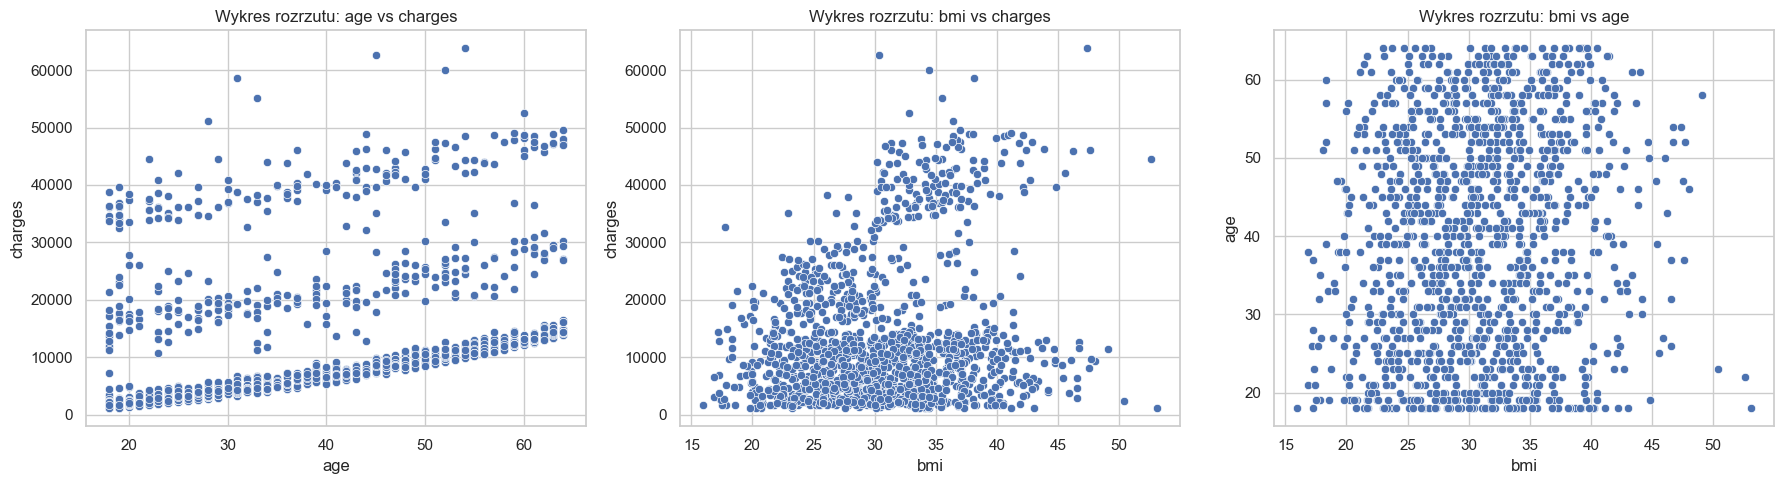

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustawienie stylu wykresu
sns.set(style="whitegrid")

# Wykres rozrzutu dla 'age' i 'charges'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Wykres rozrzutu: age vs charges')

# Wykres rozrzutu dla 'bmi' i 'charges'
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Wykres rozrzutu: bmi vs charges')

# Wykres rozrzutu dla 'bmi' i 'age'
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='age', data=df)
plt.title('Wykres rozrzutu: bmi vs age')

plt.tight_layout()
plt.show()


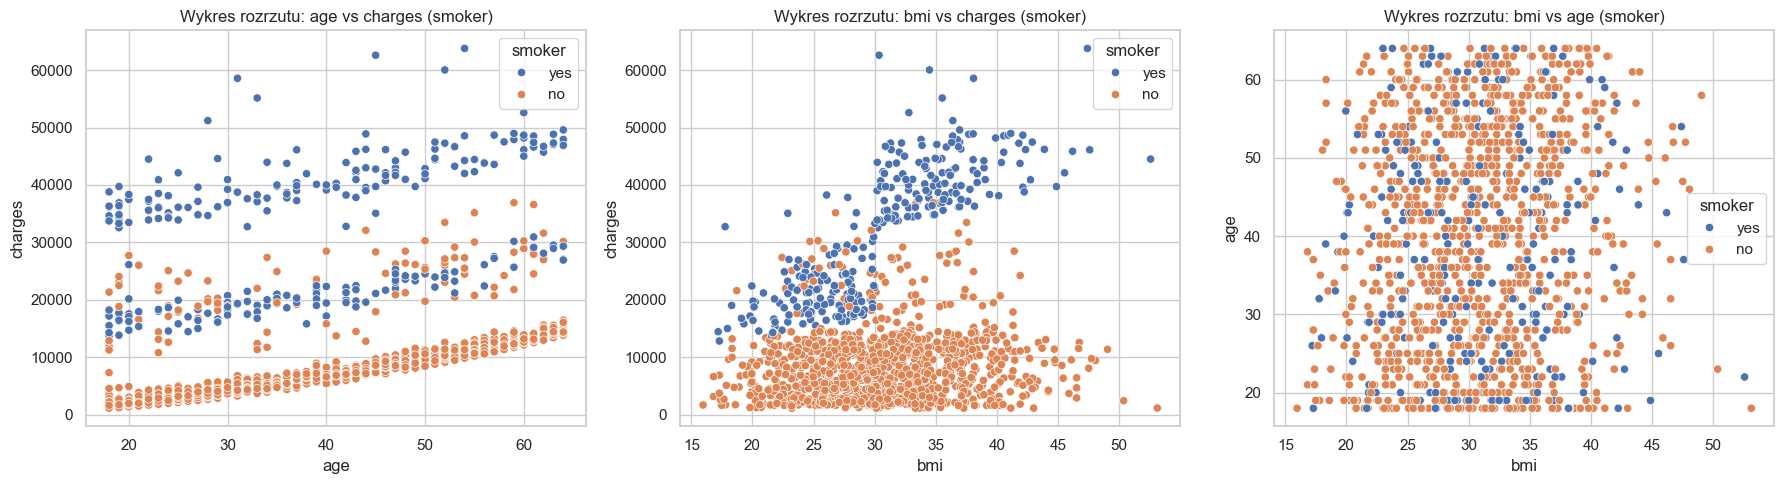

In [39]:
# Wykres rozrzutu dla 'age' i 'charges', kategoryzowany przez 'smoker'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Wykres rozrzutu: age vs charges (smoker)')

# Wykres rozrzutu dla 'bmi' i 'charges', kategoryzowany przez 'smoker'
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Wykres rozrzutu: bmi vs charges (smoker)')

# Wykres rozrzutu dla 'bmi' i 'age', kategoryzowany przez 'smoker'
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='age', hue='smoker', data=df)
plt.title('Wykres rozrzutu: bmi vs age (smoker)')

plt.tight_layout()
plt.show()


C:\Users\kamila\AppData\Local\Temp\ipykernel_11652\3563591526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})


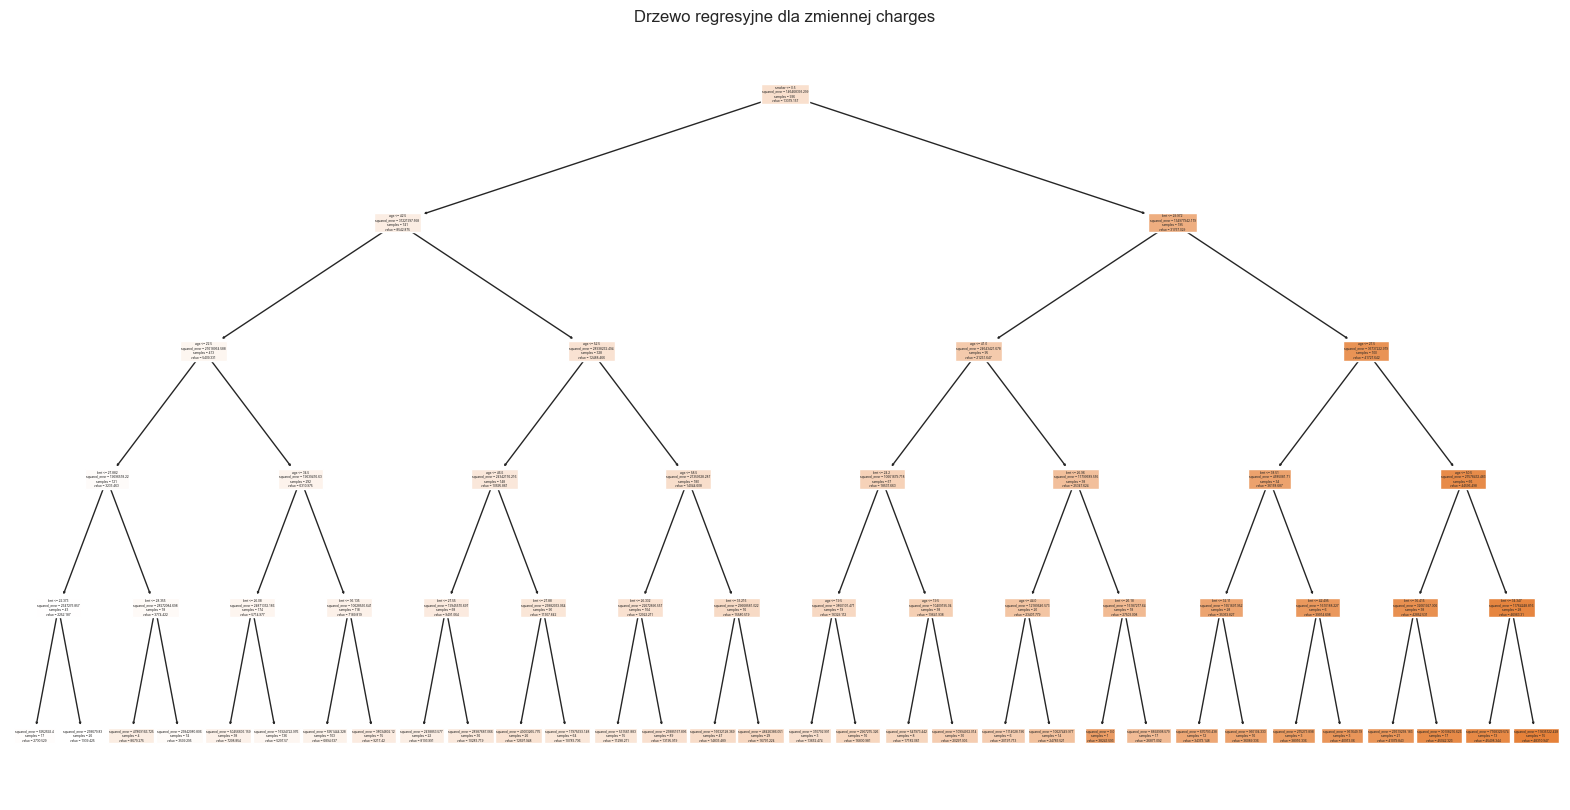

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Przygotowanie danych
X = df[['age', 'bmi', 'smoker']]  # zmienne objaśniające
y = df['charges']  # zmienna zależna

# Konwersja kolumny 'smoker' na wartości liczbowe
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

# Podział danych na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utworzenie i trening modelu drzewa decyzyjnego
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, feature_names=['age', 'bmi', 'smoker'], filled=True)
plt.title('Drzewo regresyjne dla zmiennej charges')
plt.show()


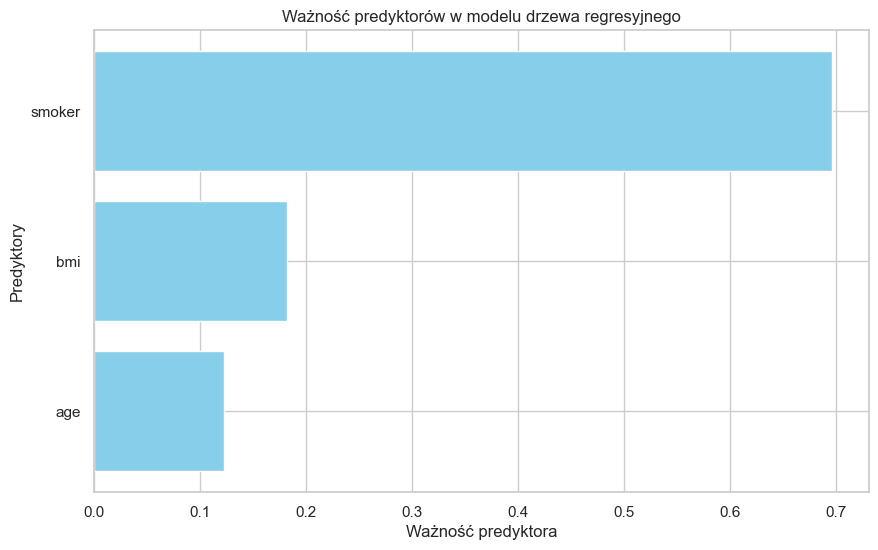

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Przygotowanie danych
X = df[['age', 'bmi', 'smoker']].copy()
y = df['charges']

# Konwersja kolumny 'smoker' na wartości liczbowe
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

# Podział danych na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utworzenie modelu
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Ważność predyktorów
feature_importances = regressor.feature_importances_
features = X.columns

# Wykres ważności predyktorów
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Ważność predyktora')
plt.ylabel('Predyktory')
plt.title('Ważność predyktorów w modelu drzewa regresyjnego')
plt.show()


In [45]:
# Otrzymaj indeksy liści dla każdego przypadku w zbiorze treningowym
leaf_indices = regressor.apply(X_train)

# Stwórz DataFrame do analizy wsparcia i pewności
leaf_data = pd.DataFrame({
    'leaf_index': leaf_indices,
    'charges': y_train
})

# Grupuj dane według indeksu liścia i obliczaj statystyki
leaf_stats = leaf_data.groupby('leaf_index').agg({
    'charges': ['count', 'var']
}).rename(columns={'count': 'support', 'var': 'variance'})

print(leaf_stats)


           charges              
           support      variance
leaf_index                      
5               17  6.324629e+06
6               26  2.482270e+05
8                4  6.382556e+07
9               74  2.619608e+07
12              38  5.182030e+07
13             136  1.705009e+07
15             103  6.009792e+06
16              15  4.075157e+07
20              22  2.554989e+06
21              36  2.981591e+07
23              26  4.472340e+07
24              64  1.826102e+07
27              15  5.695306e+05
28              89  2.617931e+07
30              47  1.699370e+07
31              29  5.015590e+07
36               3  5.561895e+05
37              16  3.101094e+06
39               8  6.262554e+05
40              30  1.137410e+07
43               6  1.336834e+06
44              14  1.144495e+07
46               1           NaN
47              17  9.448715e+06
51              12  7.317747e+05
52              16  1.013445e+06
54               3  4.129108e+05
55        

In [46]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Przygotowanie danych i modelu
X = df[['age', 'bmi', 'smoker']]  # zmienne objaśniające
y = df['charges']  # zmienna zależna
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Pobieranie indeksów liści dla próbek
leaf_indices = regressor.apply(X_test)

# Obliczanie wariancji dla każdego liścia
leaf_variances = {}
for leaf in np.unique(leaf_indices):
    leaf_variances[leaf] = np.var(y_test[leaf_indices == leaf])

# Wypisanie wariancji dla każdego liścia
for leaf, variance in leaf_variances.items():
    print(f"Liść {leaf}: wariancja = {variance}")


Liść 5: wariancja = 754521.8867662069
Liść 6: wariancja = 31214299.618244242
Liść 8: wariancja = 509.6159513556179
Liść 9: wariancja = 31309581.136602417
Liść 12: wariancja = 39404340.33811803
Liść 13: wariancja = 19494933.39915551
Liść 15: wariancja = 3405738.597682951
Liść 16: wariancja = 48700738.892482765
Liść 20: wariancja = 472419.2478870888
Liść 21: wariancja = 21111835.537406992
Liść 23: wariancja = 37482352.32919697
Liść 24: wariancja = 27629191.70191357
Liść 27: wariancja = 14272415.08992216
Liść 28: wariancja = 3580759.859109465
Liść 30: wariancja = 14920700.511436954
Liść 31: wariancja = 15459965.39250371
Liść 36: wariancja = 0.0
Liść 37: wariancja = 42802395.801679395
Liść 39: wariancja = 5855.976142922591
Liść 40: wariancja = 1985591.914580468
Liść 43: wariancja = 1184323.5941290066
Liść 44: wariancja = 3151447.9899502443
Liść 46: wariancja = 0.0
Liść 47: wariancja = 26004843.67066893
Liść 51: wariancja = 361171.7318929229
Liść 52: wariancja = 2769489.5506688277
Liść 54: 

C:\Users\kamila\AppData\Local\Temp\ipykernel_11652\1185711071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Obliczenie przewidywań na zbiorze treningowym
y_train_pred = regressor.predict(X_train)

# Koszt resubstytucji - Średni błąd kwadratowy na zbiorze treningowym
mse = mean_squared_error(y_train, y_train_pred)
print("Koszt resubstytucji (MSE):", mse)

# Współczynnik determinacji R^2 na zbiorze treningowym
r2 = r2_score(y_train, y_train_pred)
print("Współczynnik determinacji R^2:", r2)


Koszt resubstytucji (MSE): 18733336.08532657
Współczynnik determinacji R^2: 0.8720998048562171


In [49]:
X = df[['age', 'bmi', 'smoker']].copy()  # Utworzenie kopii danych
y = df['charges']
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tworzenie i trenowanie modelu
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Pobieranie indeksów liści dla próbek ze zbioru treningowego
leaf_indices = regressor.apply(X_train)

# Obliczanie wariancji dla każdego liścia na zbiorze treningowym
leaf_variances = {}
for leaf in np.unique(leaf_indices):
    leaf_variances[leaf] = np.var(y_train[leaf_indices == leaf])

# Wyświetlanie wariancji dla każdego liścia
for leaf, variance in sorted(leaf_variances.items(), key=lambda x: x[1]):
    print(f"Liść {leaf}: Wariancja = {variance}")

Liść 46: Wariancja = 0.0
Liść 6: Wariancja = 238679.8297837747
Liść 54: Wariancja = 275273.8983834971
Liść 36: Wariancja = 370792.99126454024
Liść 27: Wariancja = 531561.8828937218
Liść 39: Wariancja = 547973.4417030618
Liść 51: Wariancja = 670793.4379538422
Liść 52: Wariancja = 950104.3325783774
Liść 55: Wariancja = 951649.1901884945
Liść 43: Wariancja = 1114028.1961768055
Liść 20: Wariancja = 2438853.5771567943
Liść 37: Wariancja = 2907275.3256744593
Liść 15: Wariancja = 5951444.32812735
Liść 5: Wariancja = 5952592.400254269
Liść 61: Wariancja = 7168329.5740648955
Liść 47: Wariancja = 8892908.579435145
Liść 44: Wariancja = 10627449.976967195
Liść 40: Wariancja = 10994962.014087211
Liść 62: Wariancja = 11835722.427926239
Liść 30: Wariancja = 16632128.368636144
Liść 13: Wariancja = 16924722.976391736
Liść 24: Wariancja = 17975693.148489013
Liść 9: Wariancja = 25842080.805688906
Liść 28: Wariancja = 25885157.895488888
Liść 58: Wariancja = 26619258.18337356
Liść 21: Wariancja = 28987687.

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Wybór i skalowanie zmiennych
data = df[['age', 'bmi', 'charges']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Przygotowanie danych
data = df[['age', 'bmi', 'charges', 'children', 'smoker', 'sex', 'region']].copy()
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})  # Konwersja zmiennej 'smoker'

# Kodowanie one-hot dla zmiennych kategorycznych 'sex' i 'region'
# oraz skalowanie zmiennych numerycznych
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'charges', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'region'])
    ],
    remainder='passthrough'
)

data_scaled = preprocessor.fit_transform(data)

# Klastrowanie za pomocą Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(data_scaled)
data['cluster'] = clusters  # Przypisanie klastrów do oryginalnego DataFrame

# Agregacja danych klastra
cluster_summary = data.groupby('cluster').agg({
    'age': 'mean',
    'bmi': 'mean',
    'charges': 'mean',
    'children': 'mean',
    'smoker': 'mean',  # Procent palaczy w klastrze
    # Agregacja zmiennych kategorycznych po kodowaniu one-hot może wymagać dodatkowego przetwarzania
}).reset_index()

# Wyświetlanie podsumowania klastrów
print(cluster_summary)



   cluster        age        bmi       charges  children    smoker
0        0  49.361257  30.990611   9656.549497  1.181501  0.000000
1        1  38.683646  30.812895  29369.218708  1.142091  0.734584
2        2  24.862245  30.042844   3234.447834  0.923469  0.000000


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Przygotowanie danych
data = df[['age', 'bmi', 'charges', 'region', 'smoker', 'children']]  # Dodajemy wszystkie zmienne

# Przetwarzanie kolumn: skalowanie zmiennych numerycznych i kodowanie one-hot dla zmiennych kategorycznych
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'charges', 'children']),
        ('cat', OneHotEncoder(), ['region', 'smoker'])
    ])

# Skalowanie i kodowanie danych
data_scaled = preprocessor.fit_transform(data)

# Ustawienie modelu k-średnich
kmeans = KMeans(n_clusters=3, random_state=42)

# 10-krotny sprawdzian krzyżowy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(data_scaled):
    kmeans.fit(data_scaled[train_index])  # Trenowanie modelu na podzbiorze treningowym
    # Obliczanie wyniku - tutaj używamy metody silhouette dla przykładu
    score = silhouette_score(data_scaled[test_index], kmeans.predict(data_scaled[test_index]))
    scores.append(score)

# Wyświetlanie wyników
print("Średni wynik dla k-średnich:", np.mean(scores))


Średni wynik dla k-średnich: 0.19619679905302187


In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pandas as pd

# Przygotowanie danych
data = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].copy()

# Przetwarzanie kolumn: skalowanie zmiennych numerycznych i kodowanie one-hot dla zmiennych kategorycznych
column_transformer = ColumnTransformer(
    [
        ('num', StandardScaler(), ['age', 'bmi', 'charges', 'children']),  # Skalowanie zmiennych numerycznych
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])  # Kodowanie one-hot dla zmiennych kategorycznych
    ],
    remainder='passthrough'  # Nieprzekształcane kolumny są przekazywane dalej
)

# Klastrowanie z wykorzystaniem potoku
pipeline = make_pipeline(column_transformer, KMeans(n_clusters=3, random_state=42))
clusters = pipeline.fit_predict(data)

# Dodanie klastrów do DataFrame
data['cluster'] = clusters

# Agregacja danych klastra
cluster_summary = data.groupby('cluster').agg({
    'age': 'mean',
    'bmi': 'mean',
    'charges': 'mean',
    'children': 'mean',
    'sex': lambda x: (x == 'female').mean(),  # Procent kobiet w klastrze
    'smoker': lambda x: (x == 'yes').mean(),  # Procent palaczy w klastrze
    'region': lambda x: x.mode()[0]  # Najczęstszy region w klastrze
}).reset_index()

# Wyświetlanie podsumowania klastrów
print(cluster_summary)


   cluster        age        bmi       charges  children       sex    smoker  \
0        0  26.086106  28.508523   5719.634917  0.814090  0.497065  0.082192   
1        1  49.764505  32.054812  11024.089745  1.288396  0.529010  0.000000   
2        2  41.356846  31.849170  34742.634678  1.219917  0.406639  0.962656   

      region  
0  northwest  
1  southeast  
2  southeast  


In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
import pandas as pd

# Przygotowanie danych
data = df[['age', 'bmi', 'charges', 'children', 'smoker', 'sex', 'region']].copy()

# Zamiana wartości tekstowych na liczbowe dla zmiennej 'smoker'
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Przetwarzanie kolumn: skalowanie zmiennych numerycznych i kodowanie one-hot dla zmiennych kategorycznych
preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), ['age', 'bmi', 'charges', 'children']),  # Skalowanie zmiennych numerycznych
        ('cat', OneHotEncoder(), ['sex', 'region', 'smoker'])  # Kodowanie one-hot dla zmiennych kategorycznych
    ],
    remainder='passthrough'
)

data_scaled = preprocessor.fit_transform(data)

# Klastrowanie za pomocą Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(data_scaled)
data['cluster'] = clusters  # Przypisanie klastrów do oryginalnego DataFrame

# Agregacja danych klastra
cluster_summary = data.groupby('cluster').agg({
    'age': 'mean',
    'bmi': 'mean',
    'charges': 'mean',
    'children': 'mean',
    'smoker': 'mean',  # Procent palaczy w klastrze
    # Dodatkowe dane kategoryczne mogą wymagać specjalnej obróbki, jeśli są liczne kategorie
}).reset_index()

# Wyświetlanie podsumowania klastrów
print(cluster_summary)


   cluster        age        bmi       charges  children  smoker
0        0  39.117942  30.700013   8573.290469  1.077792     0.0
1        1  40.183521  30.507865   8019.284513  1.127341     0.0
2        2  38.514599  30.708449  32050.231832  1.113139     1.0
